# Synthetic Geometric

In [1]:
from src.Utils import save_results, get_means
from src.ExistingAlgorithms import max_value, area, sklearn_available
from src.Parametric_UMAP import load_pumap
from src.GaussianMixture import gaussian_mixture
from src.Parametric_TSNE.train import load_model
from src.Parametric_TSNE.model import Network
from src.Dataset import dataset_dat

from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import Isomap, TSNE

import umap
import torch

## Data

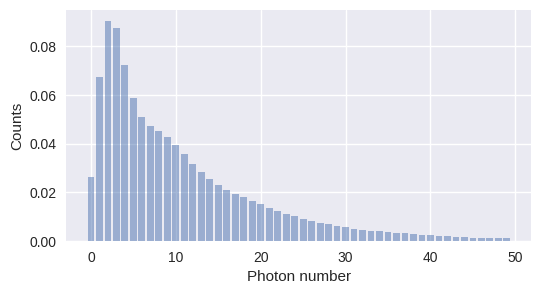

(57020, 350)

In [2]:
PATH_SAVE_LD = 'src/Results_Geometric/Low Dimension'
PATH_SAVE_D = 'src/Results_Geometric/Density'
PATH_RESULTS = 'src/Results_Geometric'
PATH_DATA = '/home/nicolasdc/Documents/Datasets/Photon-Number-Classification/Original Thomas Gerrits/data.zip'
PATH_R = 'src/Results_Geometric/randomIndexGeometric.npy'

weights = [0.07051088775512344, 0.21031270568057314, 0.38445365365055423, 0.6780434874139336, 
           0.6001082447024342, 0.9999999999999999, 0.629191619746778, 1.1954682934335052e-17, 0.9999999799606453, 0.9999999999649708]

data_train, data_test, expected_prob, db_train, db_test = dataset_dat(weights = weights,
                                                                      path_data = PATH_DATA,
                                                                      path_random_index = PATH_R,
                                                                      signal_size = 8192,
                                                                      interval = [0,350],
                                                                      standardize = True,
                                                                      plot_expected = True,
                                                                      plot_traces = False,
                                                                      n_photon_number = 50)

data_train.shape

## Methods

### Max Value

In [3]:
X_l_MAX = max_value(data_test, filtering=True)

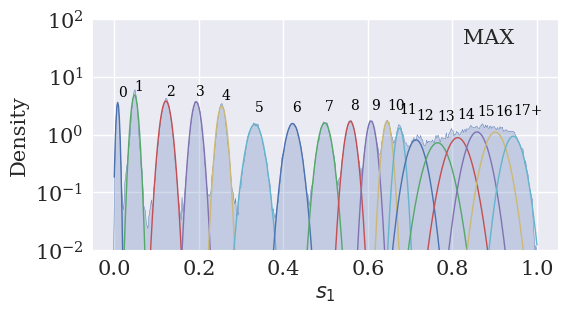

In [4]:
name_method = 'MAX'
gm = gaussian_mixture(X_l_MAX,
                      data_test,
                      means_init = get_means(name_method),
                      number_cluster = 18,
                      tol = 1e-6,
                      cluster_iter = 10,
                      width_plot=6,
                      height_plot=3)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = True,
                text = name_method,
                save_path = PATH_SAVE_D)

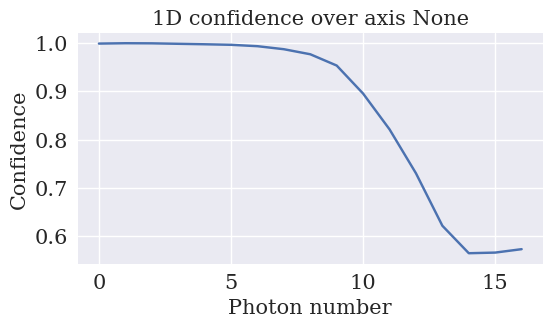

In [5]:
gm.plot_confidence_1d(expected_prob=expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Area

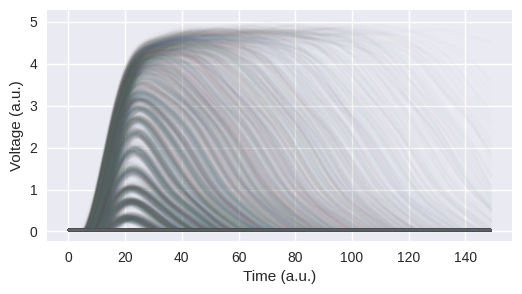

In [6]:
X_l_AREA  = area(data_test[:,:150], filtering = True, plot_filter = True, threshold = 0.03, critical_frequency = 0.1)

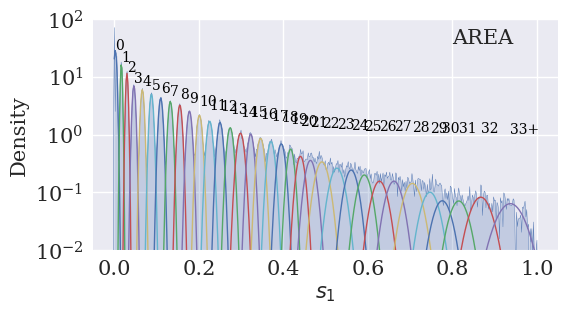

In [8]:
name_method = 'AREA'
gm = gaussian_mixture(X_l_AREA,
                      data_test,
                      number_cluster = 34,
                      cluster_iter = 3,
                      means_init = get_means(name_method, PATH_RESULTS),
                      tol = 1e-6,
                      width_plot=6,
                      height_plot=3)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

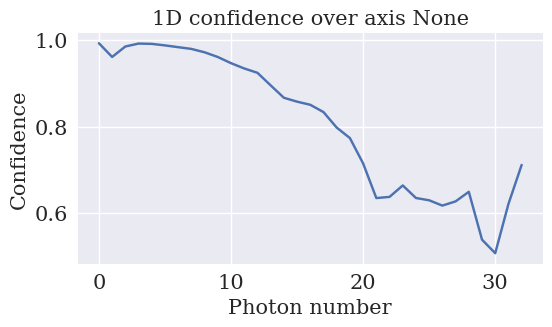

In [9]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Principal Component Analysis (PCA)

In [ ]:
X_l_PCA = sklearn_available(data_train, data_test, PATH_SAVE_LD, PCA, n_components=1, random_state=42)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


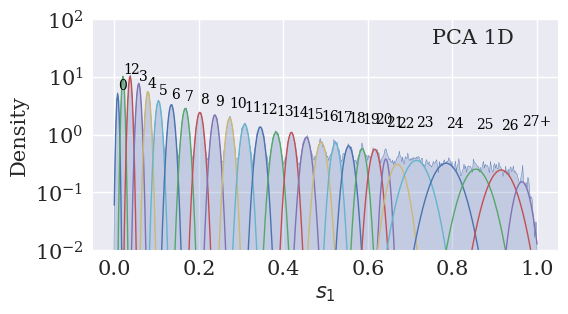

In [ ]:
name_method = 'PCA 1D'
gm = gaussian_mixture(X_l_PCA,
                      data_test,
                      number_cluster = 28,
                      cluster_iter = 5,
                      means_init = get_means(name_method, PATH_RESULTS),
                      tol = 1e-8,
                      info_sweep = 0,
                      plot_sweep = False,
                      latex = False)

gm.plot_density(bw_adjust = 0.03,
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

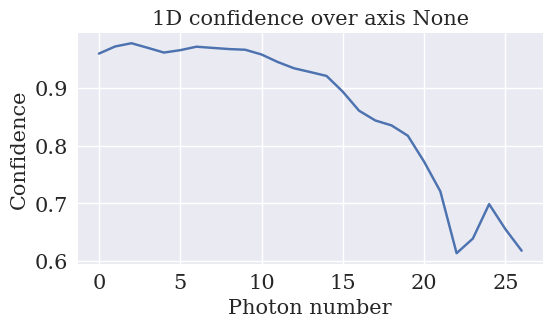

In [ ]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

In [ ]:
X_l_PCA = sklearn_available(data_train, data_test, PATH_SAVE_LD, PCA, n_components = 2, random_state=42)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


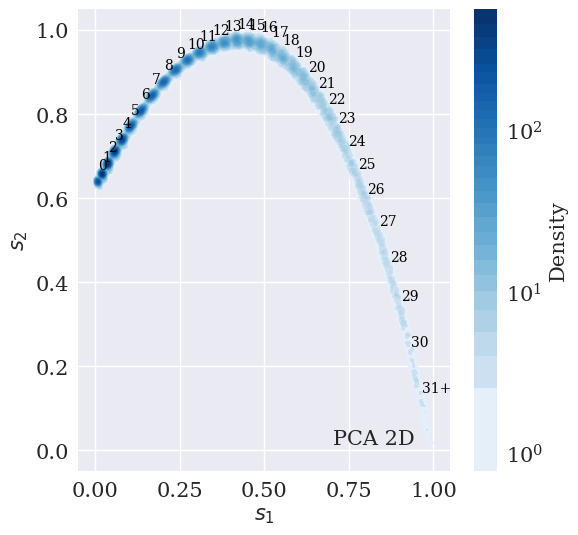

In [ ]:
name_method = 'PCA 2D'
gm = gaussian_mixture(X_l_PCA,
                      data_test,
                      number_cluster = 32,
                      cluster_iter = 5,
                      means_init = get_means(name_method, PATH_RESULTS),
                      tol = 1e-4,
                      width_plot=6,
                      height_plot=6)

gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = True,
                text = name_method,
                save_path = PATH_SAVE_D)

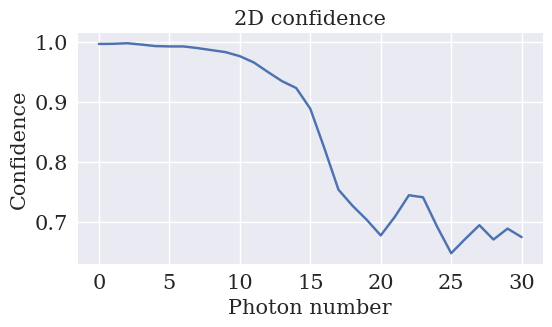

In [ ]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Kernel PCA (Radial basis function)

In [ ]:
X_l_KPCA_RBF = sklearn_available(data_train, data_test, PATH_SAVE_LD, KernelPCA, n_components = 2, kernel="rbf", gamma = 0.5, random_state=42) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


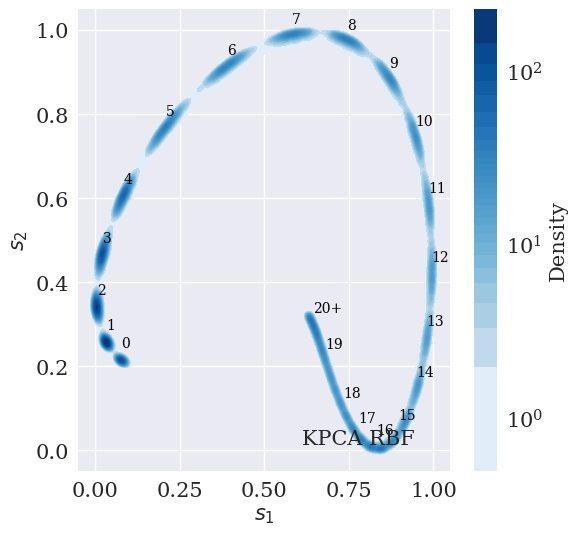

In [ ]:
name_method = 'KPCA RBF'
gm = gaussian_mixture(X_l_KPCA_RBF,
                      data_test,
                      number_cluster = 21,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 6)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

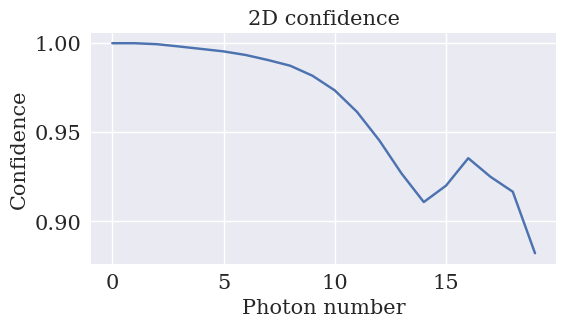

In [114]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Kernel PCA (Sigmoid)

In [ ]:
X_l_KPCA_S = sklearn_available(data_train, data_test, PATH_SAVE_LD, KernelPCA,n_components=2,kernel="sigmoid",gamma=0.01, random_state=42) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


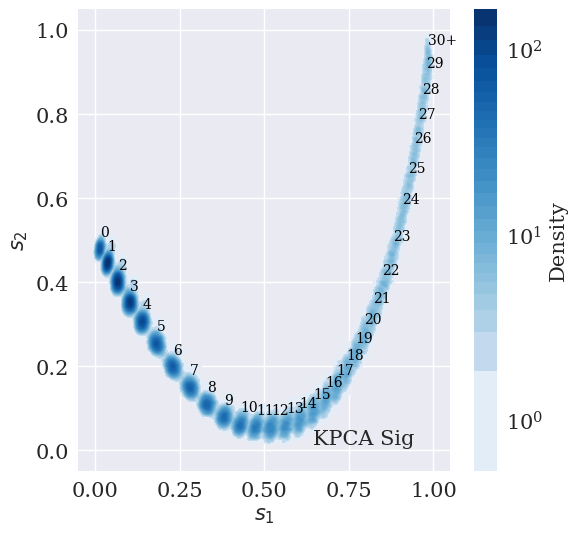

In [ ]:
name_method = 'KPCA Sig'
gm = gaussian_mixture(X_l_KPCA_S,
                      data_test,
                      number_cluster = 31,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 6)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

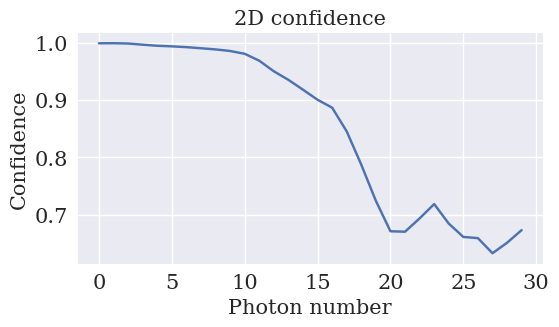

In [117]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Kernel PCA (Cosine)

In [ ]:
X_l_KPCA_C = sklearn_available(data_train, data_test, PATH_SAVE_LD, KernelPCA,n_components=2,kernel="cosine",gamma=0.01, random_state=42) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


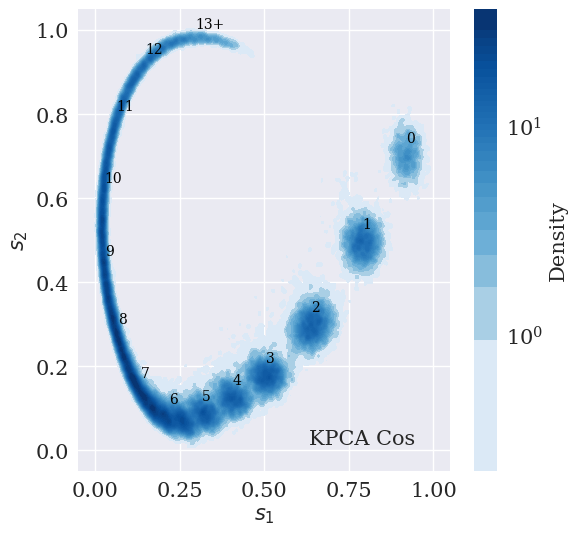

In [119]:
name_method = 'KPCA Cos'
gm = gaussian_mixture(X_l_KPCA_C,
                      data_test,
                      number_cluster = 14,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 6)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

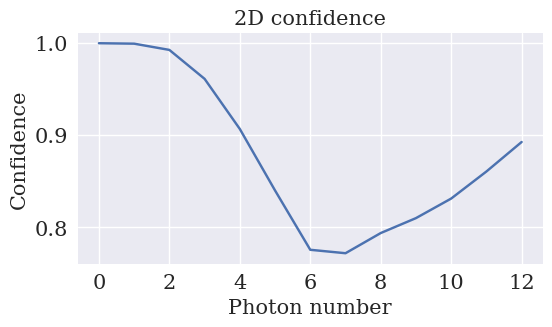

In [120]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
X_l_tSNE = sklearn_available(data_train, data_test, PATH_SAVE_LD, TSNE,n_components=2, perplexity = 450, random_state=42)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


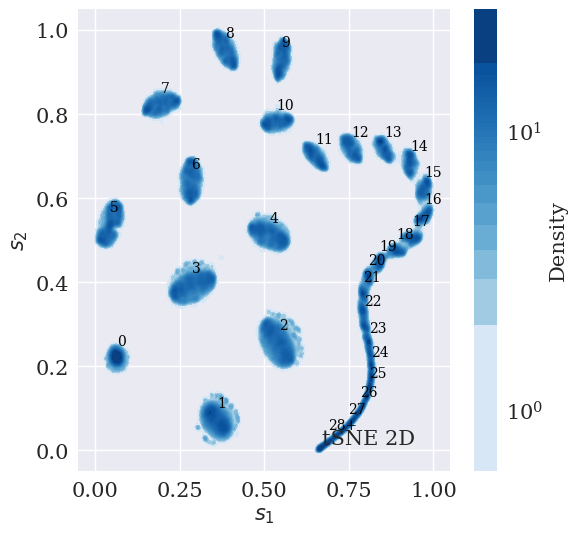

In [122]:
name_method = 'tSNE 2D'
gm = gaussian_mixture(X_l_tSNE,
                      data_test,
                      number_cluster = 29,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 6)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

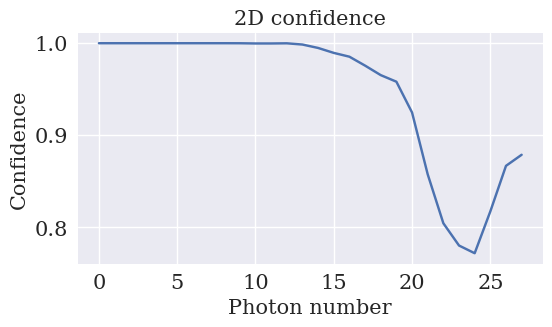

In [123]:
gm.plot_confidence_2d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

In [ ]:
X_l_tSNE = sklearn_available(data_train, data_test, PATH_SAVE_LD, TSNE,n_components=1, perplexity = 450, random_state=42)

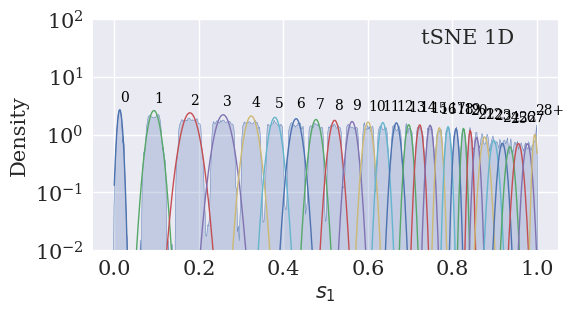

In [125]:
name_method = 'tSNE 1D'
gm = gaussian_mixture(X_l_tSNE,
                      data_test,
                      number_cluster = 29,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 3)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

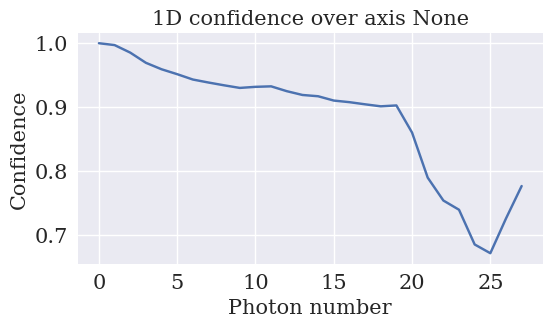

In [126]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### UMAP

In [ ]:
X_l_UMAP = sklearn_available(data_train, data_test, PATH_SAVE_LD+'/umap1d', umap.UMAP, '1000.npy', n_components=1, n_neighbors=1000, random_state=42)

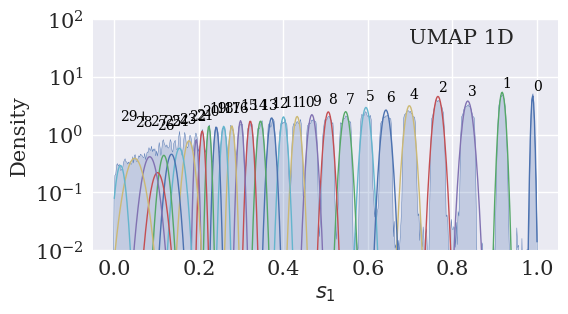

In [128]:
name_method = 'UMAP 1D'
gm = gaussian_mixture(X_low = X_l_UMAP,
                      X_high = data_test,
                      number_cluster = 30,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-6,
                      width_plot = 6,
                      height_plot = 3)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

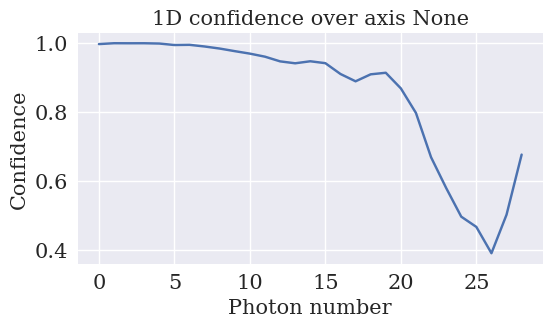

In [129]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

In [ ]:
X_l_UMAP = sklearn_available(data_train, data_test, PATH_SAVE_LD+'/umap2d', umap.UMAP, '700.npy',n_components=2, n_neighbors=700, random_state=42)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


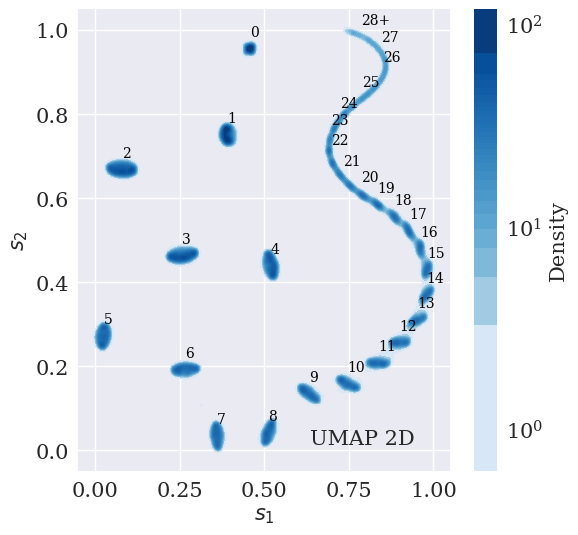

In [131]:
name_method = 'UMAP 2D'
gm = gaussian_mixture(X_low = X_l_UMAP,
                      X_high = data_test,
                      number_cluster = 29,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-4,
                      width_plot = 6,
                      height_plot = 6)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

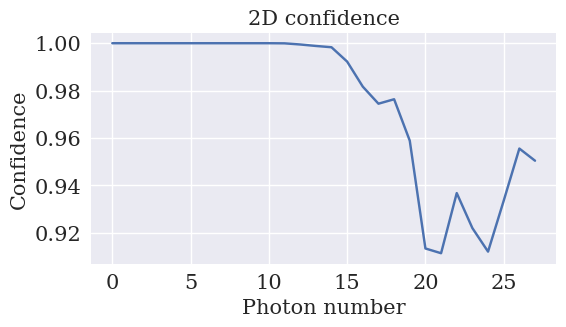

In [132]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Non-Negative Matrix Factorization (NMF)

In [ ]:
X_l_NMF = sklearn_available(data_train, data_test, PATH_SAVE_LD, NMF,n_components=1, max_iter=400, solver='mu', beta_loss='kullback-leibler', tol=1e-10, random_state=42)

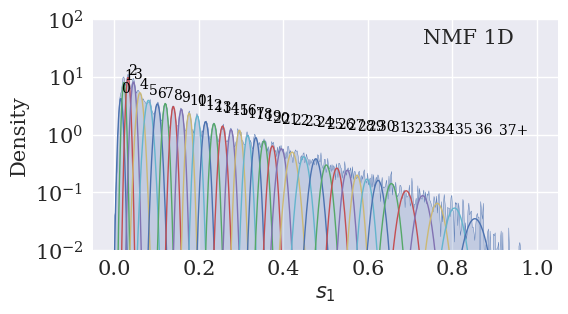

In [134]:
name_method = 'NMF 1D'
gm = gaussian_mixture(X_low = X_l_NMF,
                      X_high = data_test,
                      number_cluster = 38,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-4,
                      width_plot = 6,
                      height_plot = 3)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

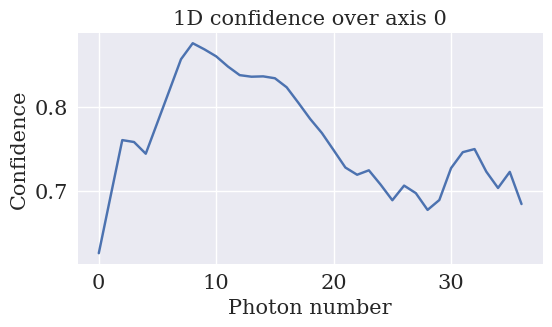

In [135]:
gm.plot_confidence_1d(expected_prob = expected_prob, axis=0)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Isomap

In [136]:
X_l_ISO = sklearn_available(data_train, data_test, PATH_SAVE_LD, Isomap, n_neighbors=15, n_components=1, eigen_solver="arpack")

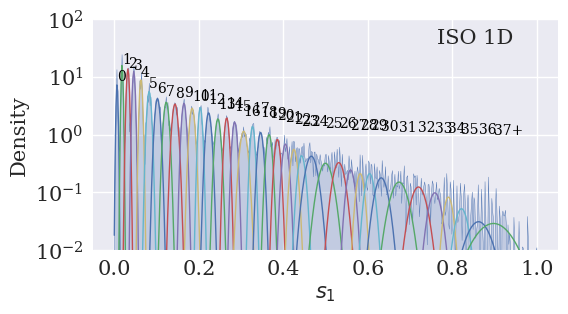

In [137]:
name_method = 'ISO 1D'
gm = gaussian_mixture(X_low = X_l_ISO,
                      X_high = data_test,
                      number_cluster = 38,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-6,
                      width_plot = 6,
                      height_plot = 3)

gm.plot_density(bw_adjust = 0.03,
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

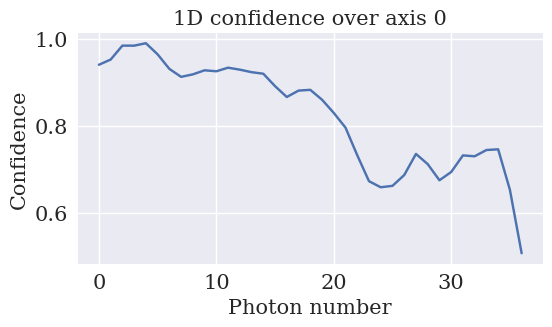

In [138]:
gm.plot_confidence_1d(expected_prob = expected_prob, axis=0)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Parametric t-SNE

In [139]:
model = load_model(Network, f'src/Parametric_TSNE/model 1D').to(device='cpu')

data_test_ = torch.from_numpy(data_test).float().view(-1, 350).to(device='cpu')
data_test_ = (data_test_ - data_test_.min()) / (data_test_.max() - data_test_.min())

with torch.no_grad():
    X_l_PTSNE = model(data_test_, encode = True).cpu().numpy()

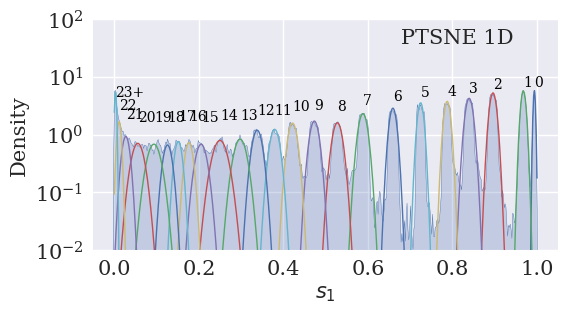

In [140]:
name_method = 'PTSNE 1D'
gm = gaussian_mixture(X_low = X_l_PTSNE,
                      X_high = data_test,
                      number_cluster = 24,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-4,
                      width_plot = 6,
                      height_plot = 3)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = True, 
                text = name_method,
                save_path = PATH_SAVE_D)

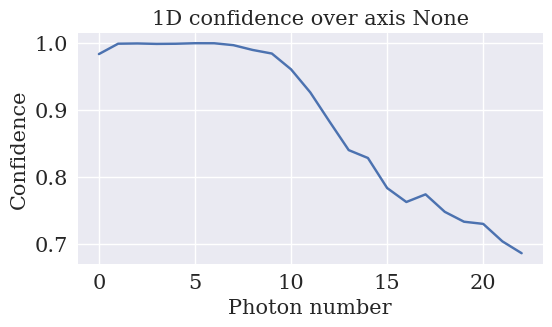

In [141]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Parametric UMAP

In [142]:
model = load_pumap('src/Parametric_UMAP/model 1D/model.ckpt').to('cpu')
X_PUMAP = model.encoder(torch.from_numpy(data_test).view(-1,350).to(dtype=torch.float)).detach().numpy()

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.


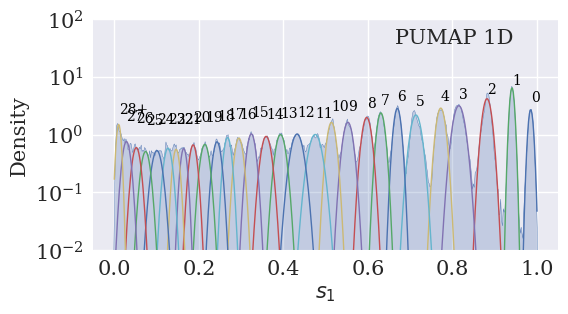

In [143]:
name_method = 'PUMAP 1D'
gm = gaussian_mixture(X_low = -X_PUMAP,
                      X_high = data_test,
                      number_cluster = 29,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-4)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = True,
                text = name_method,
                save_path = PATH_SAVE_D)

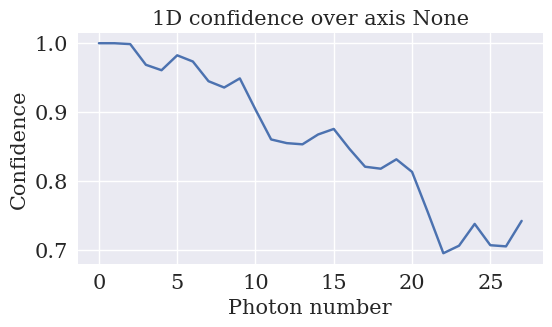

In [144]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)